# Thiết lập đường dẫn và cài đặt thư viện

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U scikit-learn # Cập nhật scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.1 MB/s 
     |████████████████████████████████| 199 kB 42.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


# Nhập các thư viện

Các thư viện cơ bản: \\


1.   [numpy](https://numpy.org/): Thư viện tính toán khoa học
2.   [pandas](https://pandas.pydata.org/): Thư viện khoa học dữ liệu
1.   [matplotlib](https://matplotlib.org/): Trực quan hoá/thống kê mô tả
2.   [seaborn](https://seaborn.pydata.org/): Trực quan hoá/thống kê mô tả

1.   Thư viện [scikit-learn](https://scikit-learn.org/stable/user_guide.html) (sử dụng phía ở phần sau)




In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
sns.set(style="white", color_codes=True)
#display.set_matplotlib_formats('svg')
#sns.set_theme(style="darkgrid")
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Thống kê mô tả

In [5]:
url = './drive/My Drive/AgriBank/'

df=pd.read_csv(url+'bank.csv', encoding='utf-8') 
df.head() # Hiển thị 5 dòng đầu

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Biểu đồ và thống kê cơ bản

(6819, 96)


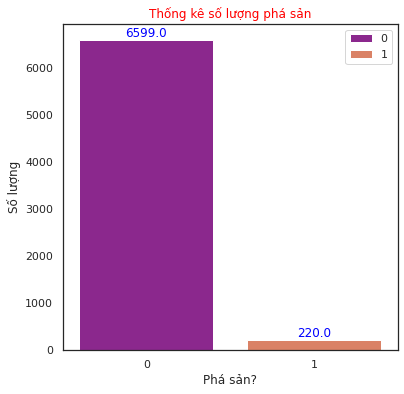

In [6]:
print(df.shape) # Xem kích thước của bảng
plt.figure(figsize=[6,6])
ax = sns.countplot(x="Bankrupt?", data=df, hue="Bankrupt?",palette="plasma", dodge=False) 
ax.set_title("Thống kê số lượng phá sản",fontsize=12, color='red')
ax.set_ylabel("Số lượng")
ax.set_xlabel("Phá sản?")
ax.legend()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()), ha='center',va='bottom',color='blue', size=12)
  # va ='top' số lượng hiển thị bên trong bar
plt.show()

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

## Đếm số lượng dữ liệu khuyết và nội suy

In [ ]:
df.isnull().sum()
#df.interpolate(method="polynomial", order=2) 

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

## Mối tương quan giữa các biến độc lập

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

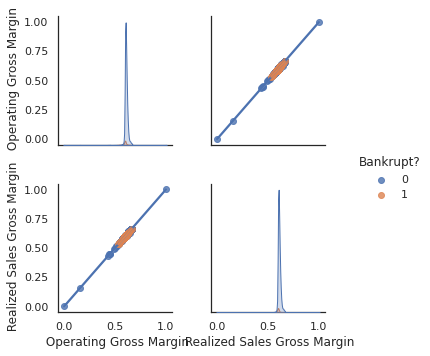

In [ ]:
print(df.columns.tolist()) 
sns.pairplot(df,vars=[' Operating Gross Margin', ' Realized Sales Gross Margin'],kind='reg', hue='Bankrupt?',diag_kind='kde')

## Tách biến dự báo (mục tiêu) và các biến độc lập

In [ ]:
label = df['Bankrupt?'] # Lấy giá trị của cột (thuộc tính) Bankrupt?
#print(label)
label.value_counts() # Đếm số mẫu theo giá trị của nhãn

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
data = df.drop('Bankrupt?',axis=1) # Xoá cột Bankrupt?
print(data.shape)
print(label.shape)

(6819, 95)
(6819,)


Chúng ta có 95 đặc trưng. Hay nói cách khác, véc-tơ đặc trưng có chiều là 95. Chúng ta có thể thu giảm chiều dùng PCA hoặc bất kì công cụ nào. Ví dụ này chúng ta dùng PCA.

## Thu giảm chiều

Danh sách API của thư viện [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.calibration) \\


In [ ]:
# Thu giảm chiều bằng phân tách ma trận
from sklearn.decomposition import PCA # PCA: Phân tích thành phần chính

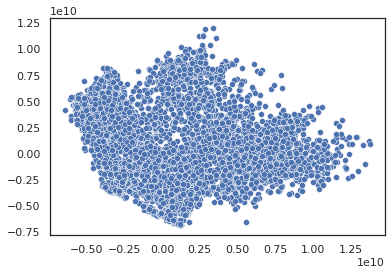

In [ ]:
transPCA = PCA(n_components =2).fit_transform(data)
x,y= transPCA[:,0],transPCA[:,1]
sns.scatterplot(x, y, data=transPCA)

In [ ]:
pca = pd.DataFrame(transPCA)
pca.head()

,0,1
0,2.165330e+09,-3.814949e+07
1,4.902366e+08,8.463795e+09
2,-2.620138e+09,-2.169966e+09
3,3.249284e+09,5.987899e+09
4,7.604602e+09,-2.951427e+09


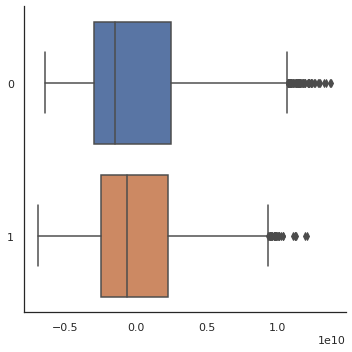

In [ ]:
sns.catplot(data=pca, orient="h", kind="box")

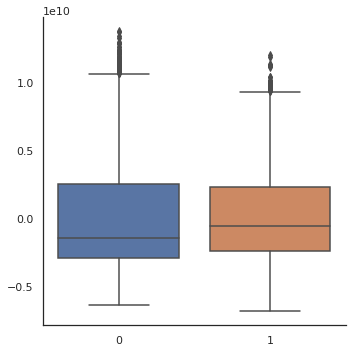

In [ ]:
sns.catplot(data=pca, kind="box")

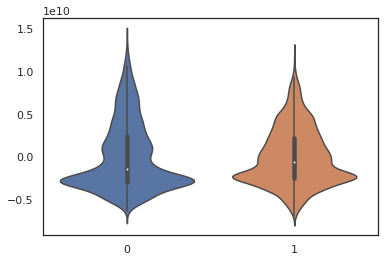

In [ ]:
sns.violinplot(data=pca)

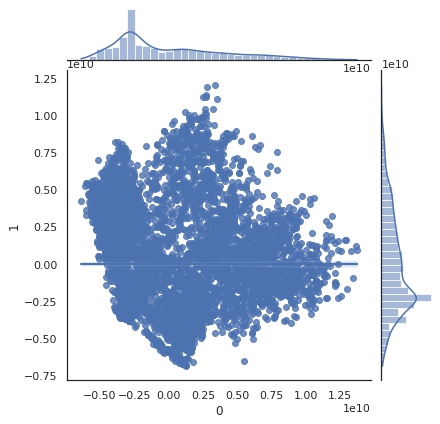

In [ ]:
sns.jointplot(pca[0],pca[1], data=pca, kind="reg")

In [ ]:
pca = pd.concat((pca,lb), axis =1)
pca.head()

,0,1,Bankrupt?
0,2.165330e+09,-3.814949e+07,1
1,4.902366e+08,8.463795e+09,1
2,-2.620138e+09,-2.169966e+09,1
3,3.249284e+09,5.987899e+09,1
4,7.604602e+09,-2.951427e+09,1


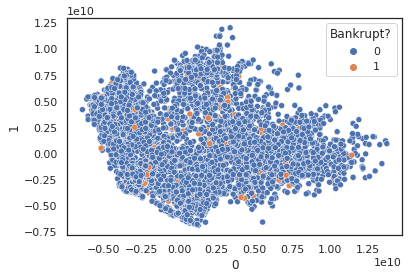

In [ ]:
sns.scatterplot(pca[0], pca[1], data = pca, hue = "Bankrupt?")

In [ ]:
# Thu giảm chiều bằng học đa tạp (manifold learning)
from sklearn.manifold import TSNE 
transTSNE = TSNE(n_components =2).fit_transform(data)

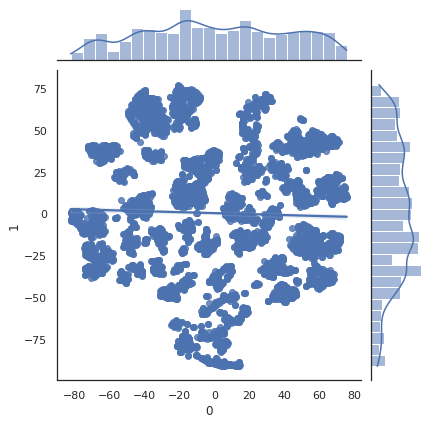

In [ ]:
sne = pd.DataFrame(transTSNE)
sns.jointplot(sne[0],sne[1],data = sne, kind ='reg')

In [ ]:
sne = pd.DataFrame(transTSNE)
sne = pd.concat((sne,label), axis=1)
sne.head(5)

,0,1,Bankrupt?
0,-63.610207,-1.748685,1
1,-65.343842,-26.431370,1
2,29.517136,19.728426,1
3,-45.894035,22.933859,1
4,-39.589619,55.002022,1


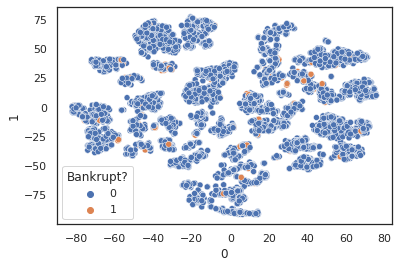

In [ ]:
sns.scatterplot(sne[0], sne[1], data = sne, hue="Bankrupt?")

# Xác định siêu tham số tối ưu
Mỗi mô hình học đều có các siêu tham số cần tối ưu. Các siêu tham số này đều được chọn thủ công. Để chọn lựa được bộ siêu tham số chúng ta cần một phương pháp véc cạn không gan tham số, nhiêu điều này khó thực hiện. Do vậy, một cách tương đối, chúng ta liệt kê một số bộ tham số. \\

<h3><font color="red">PCA:</h1>  

Siêu tham số là số thành phần (số chiều thu giảm) \\

<h3><font color="red">Mô hình tuyên tính</h1>

<font color="blue">Bình phương tối thiểu (Ordinary Least Squares)</font>: $\min_{w} || X w - y||_2^2, \text{với } f(X) = X w$, $w$ là tham số của mô hình. 

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png" width="300" height="200" />


<font color="blue">Chỉnh hoá L2 (Ridge regression):<font>

$\text{            } \min_{w} || X w - y||_2^2 + C ||w||_2^2$, 

$C$ là siêu tham số, 

$C$ càng lớn thì khả năng tránh ảnh hưởng của vấn đề đa cộng tuyến càng cao.

<font color="blue">Chỉnh hoá L1 (LASSO):<font>  

$\text{            } \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + C ||w||_1}$

<font color="blue">Elastic-Net: <font> 

$\text{            } \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + C \rho ||w||_1 +
\frac{C(1-\rho)}{2} ||w||_2 ^ 2}$




Best parameter (CV score=0.695):
{'logistic__C': 0.0001, 'pca__n_components': 20}


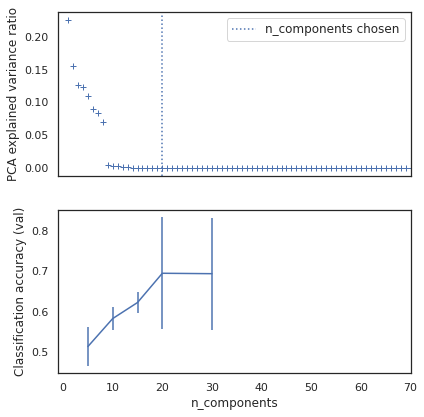

In [ ]:
# Tự động tìm số thành phần của PCA kết hợp hồi qui Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)


# Định nghĩa các bước xử lý
pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1) # tol là điều kiện dừng
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Xây dựng cấu trúc dữ liệu về bộ siêu tham số 
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 30],
    'logistic__C': np.logspace(-4, 4, 4),
}
# Tìm mô hình có bộ siêu tham số (trong param_grid ) tối ưu
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(x_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

# Các dòng này chỉ để hiển thị biểu đồ
plt.xlim(-1, 70)
plt.tight_layout()
plt.show()

<font color ='red'>Bài tập: </font>


*   Thay **GridSearchCV** bằng [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#)
*   Thay **LogisticRegression** bằng [Support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)




# Dự đoán phá sản bằng hồi qui logistic

In [ ]:
label = df['Bankrupt?']
data = df.drop('Bankrupt?',axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataPCA = PCA(n_components=20).fit_transform(data)

x_train, logis_x_test, y_train, logis_y_test = \
train_test_split(dataPCA, label, test_size = 0.3, random_state = 42)

logis_model = LogisticRegression(max_iter=10000, tol=0.1,random_state=42) # Khởi tạo mô hình
logis_model.fit(x_train, y_train.values.reshape(-1,)) # Huấn luyện

print(x_train.shape)
print(y_train.shape)

pred_logis_model = logis_model.predict(logis_x_test)

(4773, 20)
(4773,)


## Đanh giá kết quả bằng độ chính xác



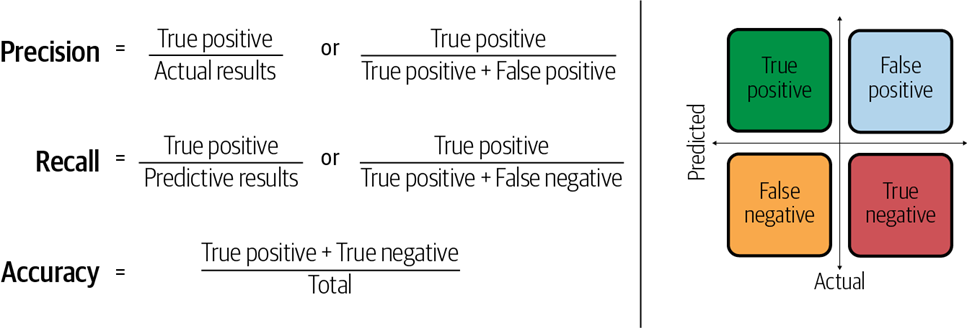

In [ ]:
from IPython.display import Image
path= url + "metric.png"
Image(filename=path)

TPR (True positive rate) = TP/(TP + 

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(logis_y_test,pred_logis_model)*100
print(acc)

76.78396871945259


## Đanh giá kết quả bằng độ Precision, Recall và F1-score

In [ ]:
from sklearn.metrics import classification_report
Class=classification_report(logis_y_test,pred_logis_model)
print(Class)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1968
           1       0.06      0.35      0.10        78

    accuracy                           0.77      2046
   macro avg       0.51      0.57      0.48      2046
weighted avg       0.93      0.77      0.84      2046



## Đanh giá kết quả bằng độ ma trận nhầm lẫn (confusion matrix)

[[1544  424]
 [  51   27]]


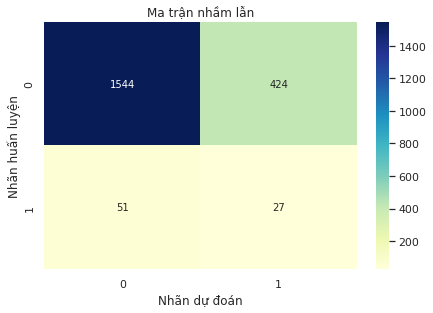

In [ ]:
from sklearn.metrics import confusion_matrix
CM_logis=confusion_matrix(logis_y_test,pred_logis_model)
print(CM_logis)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(CM_logis), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Ma trận nhầm lẫn', y=1.1)
plt.ylabel('Nhãn huấn luyện')
plt.xlabel('Nhãn dự đoán')
plt.show()

## Đanh giá kết quả bằng ROC AUC

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/ROC_curves.svg/1280px-ROC_curves.svg.png" width="600" height="400" />

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/440px-Roc_curve.svg.png" width="300" height="300" /> 


[0.         0.21544715 1.        ] [0.         0.34615385 1.        ]
56.535334584115084


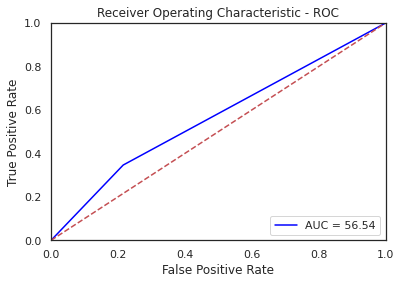

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(logis_y_test,pred_logis_model,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic - ROC')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Xử lý dữ liệu mất cân bằng**

In [ ]:
# Tập dữ liệu mất cân bằng, nếu dùng các mô hình hai lớp thì phải tiền xử lý dữ liệu
#print(f'Bình thường: {n_label.shape}')
#print(f'Phá sản: {o_label.shape}')

## Phương phap [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) (Synthetic Minority Over-sampling Technique)

In [ ]:
# Dữ liệu gốc
label = df['Bankrupt?']
data = df.drop('Bankrupt?',axis=1)

In [ ]:
# Thu giảm chiều
pca_data = PCA(n_components=20).fit_transform(data)

In [ ]:
# Phân chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(data, label, test_size = 0.3, random_state = 42)

In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE
X_over, y_over = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train)

print(X_over.shape)
print(y_over.shape)

(9262, 95)
(9262,)


## Phương pháp [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html) (Oversample using Adaptive Synthetic)

In [ ]:
from imblearn.over_sampling import ADASYN
X_over, y_over = ADASYN(sampling_strategy='minority').fit_resample(X_train, y_train)

## Phương pháp [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over, y_over = RandomOverSampler(sampling_strategy='minority').fit_resample(X_train, y_train)

## Kết hợp SMOTE và Logistic Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

logis_smote = LogisticRegression(max_iter=10000, tol=0.1,random_state=42)
logis_smote.fit(X_train, y_train.values.reshape(-1,))

pred_logis_smote= logis_smote.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred_logis_smote)*100
print(acc)

95.74780058651027


In [ ]:
from sklearn.metrics import classification_report
Class=classification_report(y_test,pred_logis_smote)
print(Class)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1968
           1       0.09      0.01      0.02        78

    accuracy                           0.96      2046
   macro avg       0.53      0.50      0.50      2046
weighted avg       0.93      0.96      0.94      2046



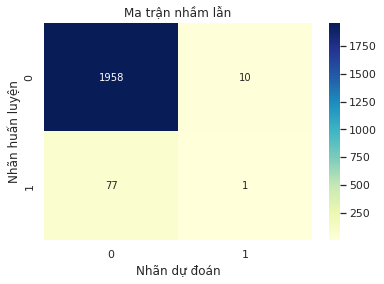

In [ ]:
from sklearn.metrics import confusion_matrix
CM_logis_smote=confusion_matrix(y_test,pred_logis_smote)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(CM_logis_smote), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
#plt.tight_layout()
plt.title('Ma trận nhầm lẫn', y=1.1)
plt.ylabel('Nhãn huấn luyện')
plt.xlabel('Nhãn dự đoán')
plt.show()

[0.         0.21544715 1.        ] [0.         0.34615385 1.        ]
56.535334584115084


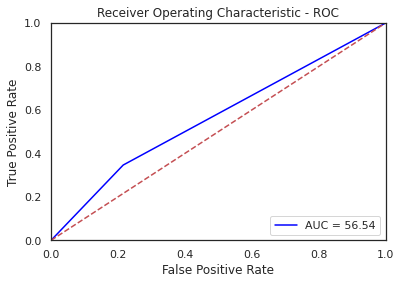

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,pred_logis_model,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic - ROC')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## [Cây quyết định](https://scikit-learn.org/stable/modules/tree.html#tree) và SMOTE





In [ ]:
#label = df['Bankrupt?']
#data = df.drop('Bankrupt?',axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier() # Khởi tạo cây quyết định

dtree.fit(X_train,y_train) # huấn luyện

pred_tree = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ACC=accuracy_score(y_test,pred_tree)*100
print('With decision tree accuracy is: ',ACC) # accuracy

With decision tree accuracy is:  94.86803519061584


In [ ]:
from sklearn.metrics import classification_report
Class=classification_report(y_test,pred_tree)
print(Class)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1968
           1       0.32      0.29      0.30        78

    accuracy                           0.95      2046
   macro avg       0.64      0.63      0.64      2046
weighted avg       0.95      0.95      0.95      2046



[[1918   50]
 [  55   23]]


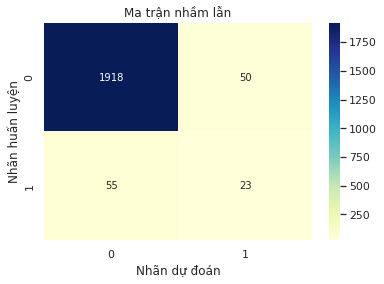

In [ ]:
from sklearn.metrics import confusion_matrix
CM_tree_smote=confusion_matrix(y_test,pred_tree)
print(CM_tree_smote)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(CM_tree_smote), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
#plt.tight_layout()
plt.title('Ma trận nhầm lẫn', y=1.1)
plt.ylabel('Nhãn huấn luyện')
plt.xlabel('Nhãn dự đoán')
plt.show()

[0.        0.0254065 1.       ] [0.         0.29487179 1.        ]
63.473264540337716


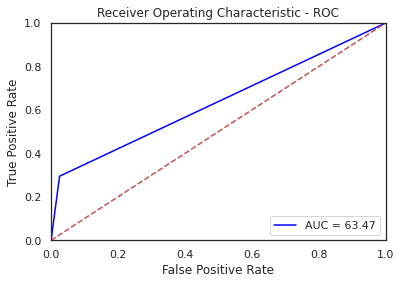

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,pred_tree,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic - ROC')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

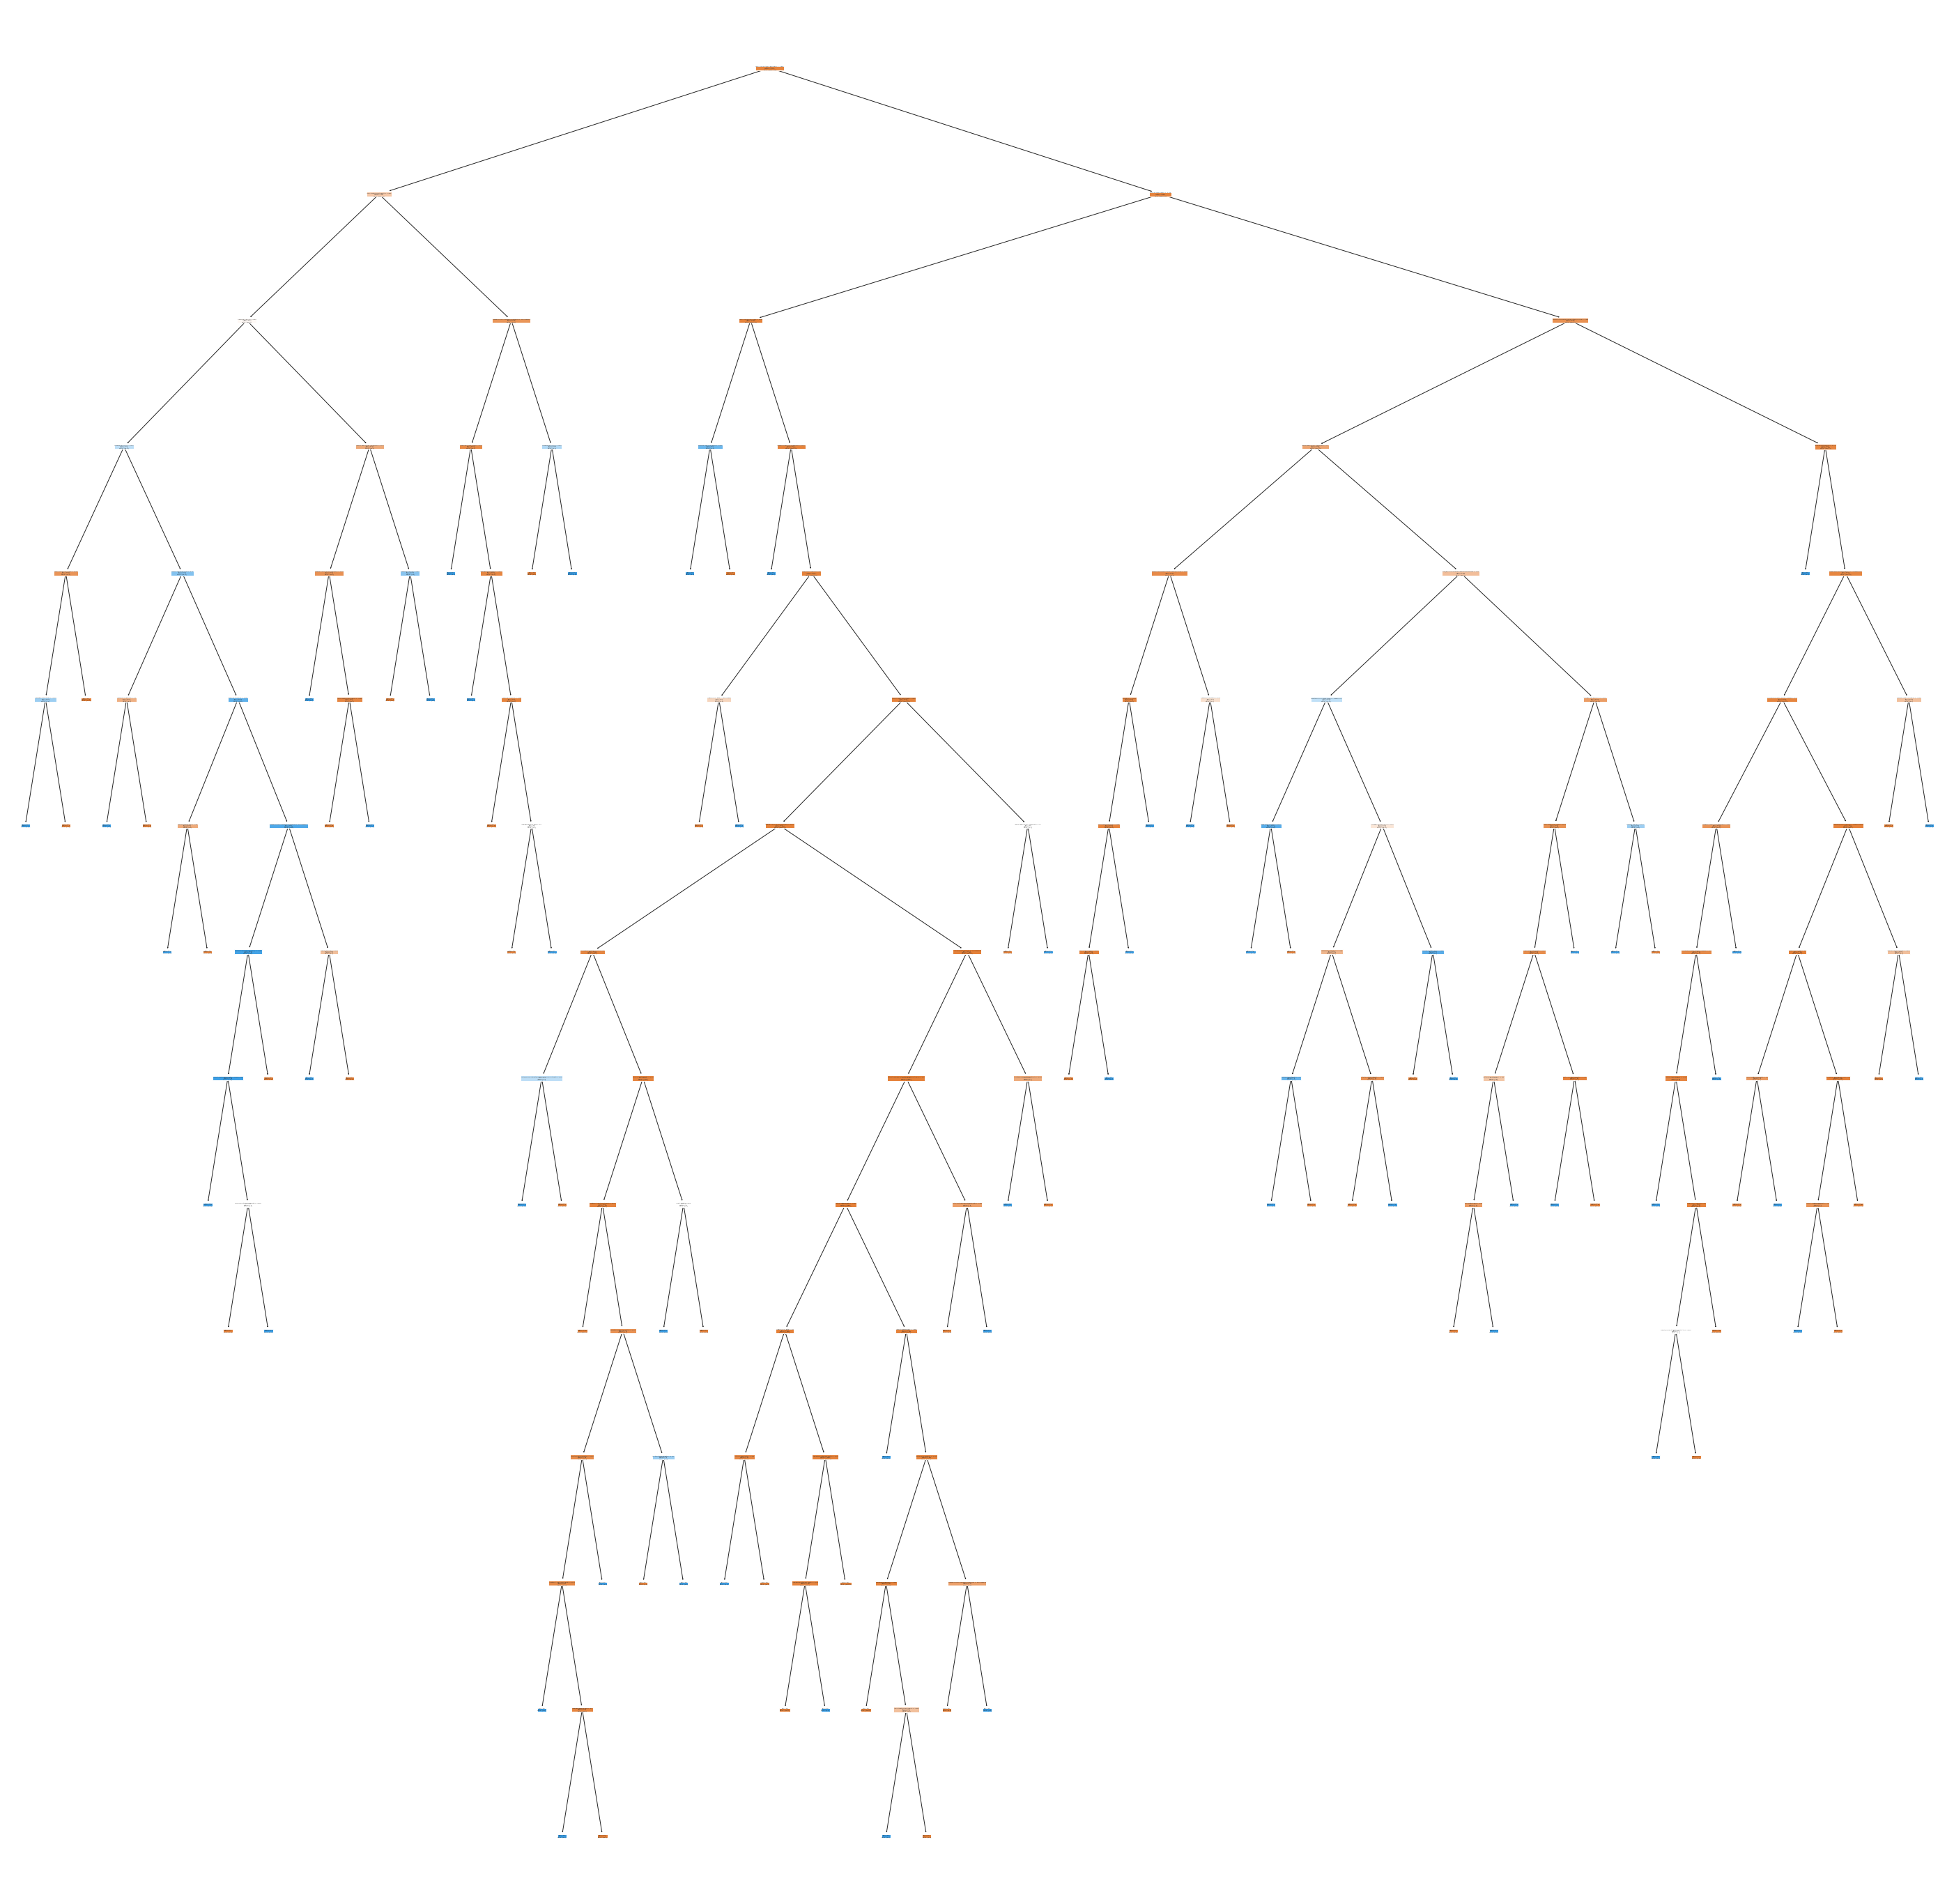

In [ ]:
from sklearn import tree
col_names = X_train.columns
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dtree, feature_names=col_names, filled=True)

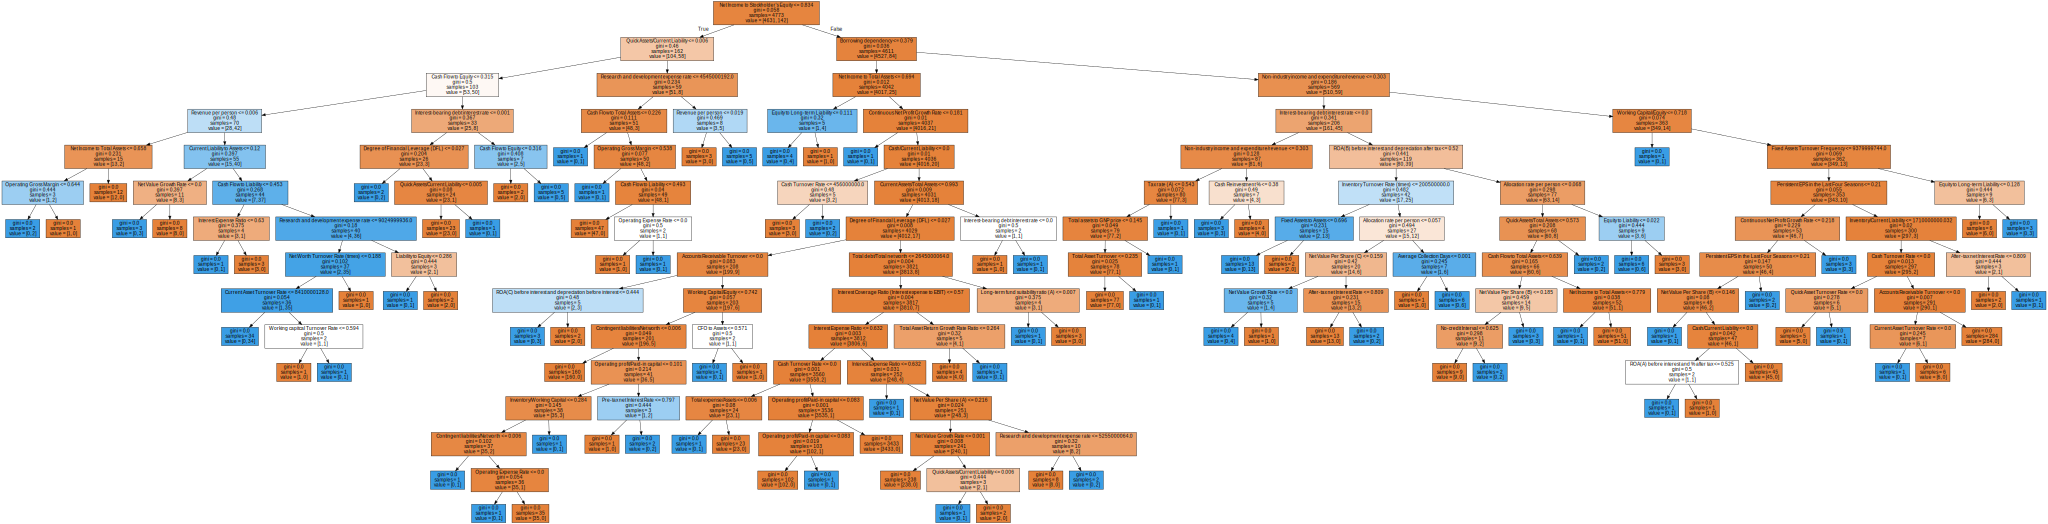

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, feature_names=col_names, out_file=None, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Học nhóm - Rừng ngẫu nhiêu

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini')
rf.fit(X_over,y_over)
pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ACC=accuracy_score(y_test,pred_rf)*100
print('With random forest accuracy is: ',ACC) # accuracy

With random forest accuracy is:  96.52981427174976


In [ ]:
from sklearn.metrics import classification_report
Class=classification_report(y_test,pred_rf)
print(Class)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.44      0.54      0.49        78

    accuracy                           0.96      2046
   macro avg       0.71      0.76      0.73      2046
weighted avg       0.96      0.96      0.96      2046



[[1915   53]
 [  36   42]]


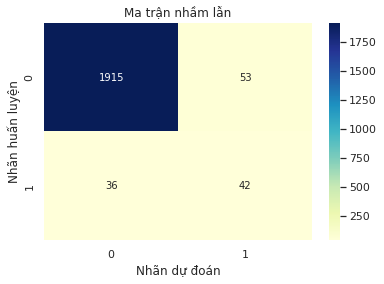

In [ ]:
from sklearn.metrics import confusion_matrix
CM_rf=confusion_matrix(y_test,pred_rf)
print(CM_rf)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(CM_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
#plt.tight_layout()
plt.title('Ma trận nhầm lẫn', y=1.1)
plt.ylabel('Nhãn huấn luyện')
plt.xlabel('Nhãn dự đoán')
plt.show()

[0.         0.02693089 1.        ] [0.         0.53846154 1.        ]
75.57653220762975


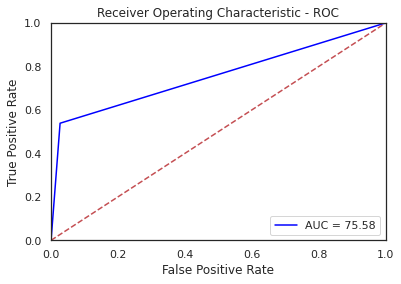

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,pred_rf,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic - ROC')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Học nhóm - XGBoost

In [ ]:
print(label.shape)
print(data.shape)
print(dataPCA.shape)

(13198, 1)
(13198, 95)
(13198, 10)


In [ ]:
from xgboost import XGBClassifier

xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_over,y_over.values.reshape(-1,))

XGBClassifier(colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=9,
              n_estimators=5000, nthread=4, reg_alpha=0.005, seed=27,
              subsample=0.8)

In [ ]:
xgb_pred=xgb4.predict(X_test)

# Calculate Model accuracy by comparing y_test and xgb_pred
acc_xgb = round( accuracy_score(y_test, xgb_pred) * 100, 2 )
print( 'Accuracy of XGB Classifier: ', acc_xgb )
print("Confusion Matrix \n",confusion_matrix(y_test,xgb_pred))

Accuracy of XGB Classifier:  96.53
Confusion Matrix 
 [[1960    8]
 [  63   15]]


In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,xgb_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

[0.         0.00406504 1.        ] [0.         0.19230769 1.        ]
59.412132582864295


[[1935   33]
 [  48   30]]


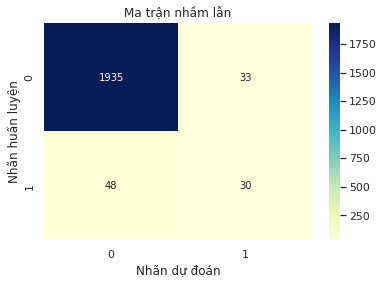

In [ ]:
from sklearn.metrics import confusion_matrix
CM_xgb=confusion_matrix(y_test,xgb_pred)
print(CM_xgb)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(CM_xgb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
#plt.tight_layout()
plt.title('Ma trận nhầm lẫn', y=1.1)
plt.ylabel('Nhãn huấn luyện')
plt.xlabel('Nhãn dự đoán')
plt.show()

# Bài tập


1.   Dự báo phá sản dùng [Support vector machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#)
2.   Thay phương pháp thu giảm chiều PCA bằng t-SNE

